<a href="https://colab.research.google.com/github/IKEDAKAZUKI/Qiskit-Tutorial/blob/main/Qiskit_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial on Qiskit by Kazuki Ikeda at Stony Brook University

I give a tutorial on quantum simulation with IBM Qiskit.
More projects are provied in my [website](https://kazukiikeda.studio.site/)

# Install Qiskit and packages

If Qiskit is not installed, please install it.

In [1]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 980.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from qiskit import * #qiskit
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit import QuantumCircuit, QuantumRegister, transpile, execute, Aer, BasicAer
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info import partial_trace, entropy
import qiskit.quantum_info as qi

We first get the simulator.

In [3]:
simulator = Aer.get_backend('qasm_simulator')

# Build quantum circuits

In what follows, we explain basic operators, measurement, Bell states, reduced dencity matrices, the entanglement entropy. 

You can learn how to execute circuits using "qasm_simulator" and state vector simulator "aer_simulator_statevector". 

- Computational basis
$Z|0\rangle=+|0\rangle, Z|1\rangle=-|1\rangle$
$$ |0\rangle=\begin{pmatrix}1\\0\end{pmatrix},\quad|1\rangle=\begin{pmatrix}0\\1\end{pmatrix} $$

- $X$-basis
$X|+\rangle=+|+\rangle, X|-\rangle=-|-\rangle$
$$ |+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle),|-\rangle=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle), $$

- 1-qubit operators 
$$X=\begin{pmatrix}0&1\\1&0\end{pmatrix},\quad Y=\begin{pmatrix}0&-i\\i&0\end{pmatrix},\quad Z=\begin{pmatrix}1&0\\0&-1\end{pmatrix}$$

- 2-qubit operator 
$\text{CNOT}=|0\rangle\langle0|\otimes I+|1\rangle\langle1|\otimes X$. 

The gate set $\{X,Y,Z,CNOT\}$ is a universal gate set; any unitary operator can be approximated by those operators.

Other useful operators
- Hadamard gate $H=\frac{1}{\sqrt{2}}\begin{pmatrix}1&1\\1&-1\end{pmatrix}$
- Rotation gates $e^{-i\alpha X/2},e^{-i\alpha Y/2},e^{-i\alpha Z/2}$

The Initial state of the default qubit is $|0\rangle$. This can be conformed by the following circuit and measurment. 

In [4]:
n_qubit = 1
qr = QuantumRegister(n_qubit)
cr = ClassicalRegister(n_qubit) #classical register to store resulting bits
qc = QuantumCircuit(qr,cr) #quantum circuit with quantum and classical registers

qc.draw()

q0: 
      
c0: 1/

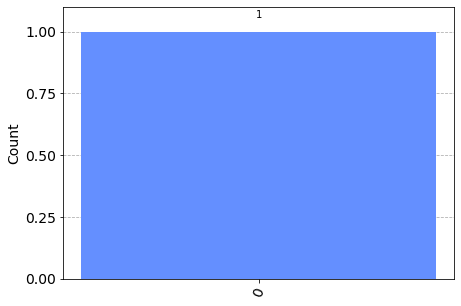

In [5]:
qc.measure(qr,cr)

# shots is number of execution
shots=100

# execute the circuit
job = execute(qc, simulator, shots=1) 

# get a result
result = job.result() 

# get counts to obtain each bit string
counts = result.get_counts(qc) 

# plot histogram
plot_histogram(counts) 

Draw a quantum circuit consisting of two qubits, an Hadamard gate and a CNOT.

The follwoing circuits generates a Bell state $|\Phi^+\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$.

$|\Phi^+\rangle$ is practucally important for Quantum Teleportation [(code)](https://colab.research.google.com/drive/1WZUMd1tbouOwmXCn8txoJMOXG8TUisau?usp=sharing)

In [9]:
n_qubit = 2
qr = QuantumRegister(n_qubit)
cr = ClassicalRegister(n_qubit) 
qc_bell = QuantumCircuit(qr,cr) 

qc_bell.h(qr[0])
qc_bell.cx(qr[0],qr[1])

qc_bell.draw()

┌───┐     
q9_0: ┤ H ├──■──
      └───┘┌─┴─┐
q9_1: ─────┤ X ├
           └───┘
c2: 2/══════════

One will obtain $00$ and $11$ with the same probanbility. 

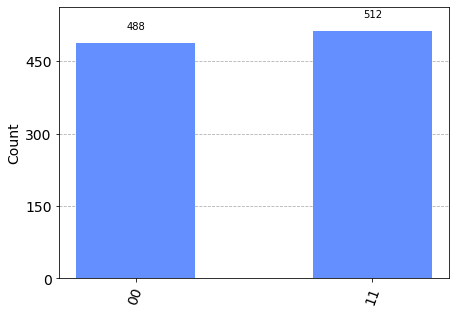

In [10]:
qc_bell.measure(qr,cr)


# execute the circuit
job = execute(qc_bell, simulator, shots=1000) 

# get a result
result = job.result() 

# get counts to obtain each bit string
counts = result.get_counts(qc_bell) 

# plot histogram
plot_histogram(counts) 

One can confirm this is indeed an maximally entangled state, using the state_vector simulator.

We compute the entanglement entropy $S=-Tr(\rho_1\log\rho_1)$, where $\rho_1=Tr_0\rho$ is the reduced densicty matrix, obtained by tracing out the first qubit from $\rho=|\Phi^+\rangle\langle\Phi^+|=\frac{|00\rangle\langle00|+|11\rangle\langle00|+|00\rangle\langle11|+|11\rangle\langle11|}{2}$.

By tracing out over the frist qubit we obtain
$$\rho_1=Tr_0\rho=\frac{|0\rangle\langle0|+|1\rangle\langle1|}{2}=\begin{pmatrix}0.5&0\\0&0.5\end{pmatrix}\\
S=-Tr(\rho_1\log\rho_1)=\log2$$

For a two qubit stste, the maximal value of the entanglement entropy is $\log_{10}2=0.3\cdots$. 

In [11]:
n_qubit = 2
qr = QuantumRegister(n_qubit)
qc_bell = QuantumCircuit(qr) 

qc_bell.h(qr[0])
qc_bell.cx(qr[0],qr[1])

backend = Aer.get_backend('aer_simulator_statevector')
qc_bell = transpile(qc_bell, backend)
qc_bell.save_statevector()

job = backend.run(qc_bell)
statevector = job.result().get_statevector(qc_bell)

reduced_state = partial_trace(statevector, [1])
print(reduced_state)

print("Entanglement entropy is",entropy(reduced_state, base=10)) # defalt function is entropy(state, base=2)


DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))
Entanglement entropy is 0.30102999566398114


# Implementing the transverse Ising model (Static Hamiltonian)

In what follows we demonstrate quantum simulation of Ising model in two ways. 
We first consider time-evolution with the **static Hamiltonian**. 

You can learn implementation of a time-ordered integral, Suzuki-Trotter decomposition, dynamics after a quench, computation of magnetization.  
 

The Hamiltonian is
$$
H=H_{ZZ}+H_{X},
$$
where
$$H_{ZZ}=-J\sum_{j=0}^{N-2}Z_{j}Z_{j+1},\quad  H_{X}=-h\sum_{j=0}^{N-1}X_{j}$$

We use $|0\cdots0\rangle$ as the initial satte and consider time evolution of magnetization $\frac{1}{N}\sum_{j=0}^{N-1}Z_{j}$
$$m(t)=\frac{1}{N}\langle00\cdots0|e^{i H t}\,\sum_{j=0}^{N-1}Z_{j}\, e^{-i H t}|00\cdots0\rangle.$$


The time-evolution of the initial state is given by the time-ordered integral
$$|\psi(t)\rangle=\mathcal{T}e^{-i\int_0^tHdt}|0\cdots0\rangle.$$
It is important that $Z$ and $X$ do not commute $[Z,X]\neq0$.


We approximate the time-volution by discritizing the time-step $\Delta t$ in the following way
$$|\psi(k\Delta t)\rangle=e^{-i\Delta t H_{XX}}e^{-i\Delta t H_{Z}}|\psi((k-1)\Delta t)\rangle.$$ 

This technique is called Suzuki-Trotter decomposition and $\Delta t$ is called a Suzuki-Trotter step. 

# Time-evolution using the $ZZ$-gates and $X$-gates

### Step 1: Implement a Suzuki-Trotter step via elementary gates
In general, $e^{i\alpha Z_jZ_k}$ can be implemened by the folowing gate 
$$e^{i\alpha Z_{j}Z_{k}}= CX_{jk}R_{Z,k}(2\alpha)CX_{jk},$$
where $CX_{jk}$ is the CNOT gate $$CX_{jk}=|0\rangle_j\langle0|\otimes I+|1\rangle_j\langle1|\otimes X_k$$
and $R_{Z,k}(2\alpha)=e^{i\alpha Z_k}$ is the rotation about the $z$-axis at $k$.  

Therefore we can implement the $H_{ZZ}$ term by 
$$e^{-iH_{ZZ}\Delta t}=\prod_{j=0}^{N-2}CX_{j,j+1}R_{Z,j+1 }(-2J\Delta t)CX_{j,j+1}.$$

Implementation of $H_X$ is straightforward
$$e^{-iH_{X}\Delta t}=\prod_{j=0}^{N-1}R_{X,j }(-2h\Delta t).$$

Draw the minimal quantum circuit

In [12]:
n_site=2
qr = QuantumRegister(n_site)
cr = ClassicalRegister(n_site)

### make main quantum circuit
qc = QuantumCircuit(qr,cr)

###make measurement circuit
qc_meas = QuantumCircuit(qr,cr)
qc_meas.measure(qr,cr)

J=1
h=1
dt=0.1
###exp(-iH_{ZZ}\Delta t)
for i in range(n_site-1):
    
    qc.cx(qr[i],qr[i+1])
    qc.rz(-2*J*dt, qr[i+1])
    qc.cx(qr[i],qr[i+1])

###exp(-iH_{X}\Delta t)    
for i in range(n_site):
    qc.rx(-2*h*dt,qr[i])

qc.draw()

┌──────────┐
q16_0: ──■────────────────■──┤ Rx(-0.2) ├
       ┌─┴─┐┌──────────┐┌─┴─┐├──────────┤
q16_1: ┤ X ├┤ Rz(-0.2) ├┤ X ├┤ Rx(-0.2) ├
       └───┘└──────────┘└───┘└──────────┘
 c3: 2/══════════════════════════════════

### Step 2: Measurement of the magnetization

We measure $Z_j~(j=0,\cdots,N-1)$ and obtain the bitstring $b=b_0\cdots b_{N-1}$, where each $b_j$ is either 0 or 1. 

$b_j=0$ means that +1 eigenvalue of $Z_j$ is obtained and $b_j=1$ means that -1 eigenvalue of $Z_j$ is obtained. 

To compute $m(t)=\frac{1}{N}\langle\psi(t)|\sum_{j=0}^{N-1}Z_j|\psi_t\rangle$, we conbert the bitstrings as follows 
$$m(t)=\frac{1}{N}\langle\psi(t)|\sum_{j=0}^{N-1}Z_{j}|\psi(t)\rangle
\\
= 
\frac{1}{N}\sum_{j=0}^{N-1}\sum_{b_{0},\dots,b_{N-1}}(-)^{b_{j}}|\langle b_{0}\cdots b_{N-1}|\psi(t)\rangle|^{2}\\
=\frac{1}{N}\sum_{b_{0},\dots,b_{N-1}}\sum_{j=0}^{N-1}(-)^{b_{j}} \frac{\text{count}(b_{0}\cdots b_{N-1})}{n_{\text{shots}}}.
$$
where count($b_{0}\cdots b_{N-1}$) counts the number of times a bitstring $b_{0}\cdots b_{N-1}\in\{0,1\}^N$ apperes.  

In [22]:
### parameters
n_site = 4
J = 1 # antiferromagnetic phase if J>0 otherwise ferromagnetic phase
h = 4 #If J>>h, the antiferromagnetic phase is dominant. If J<<h, quantum paramagnetic phase is dominant. 

step_max = 100
t_max = 5
dt = t_max/step_max

### simulator and shots
simulator = Aer.get_backend('qasm_simulator')
n_shots = 10000

### quantum registers
qr = QuantumRegister(n_site)
cr = ClassicalRegister(n_site)

### make main quantum circuit
qc = QuantumCircuit(qr,cr)

###make measurement circuit
qc_meas = QuantumCircuit(qr,cr)
qc_meas.measure(qr,cr)

time_list= []  #list of time
mag_list =[] #list of magnetization

### Suzuki-Trotter steps
for step in range(1,step_max+1):
    #act gates to implement one Suzuki-Trotter step
    ###exp(-iH_{ZZ}\Delta t)
    for i in range(n_site-1):
        
        qc.cx(qr[i],qr[i+1])
        qc.rz(-2*J*dt, qr[i+1])
        qc.cx(qr[i],qr[i+1])

    ###exp(-iH_{X}\Delta t)    
    for i in range(n_site):
        qc.rx(-2*h*dt,qr[i])
        
    #combine the main circuit and the measurement circuit to have the total circuit
    qc_total = qc.compose(qc_meas)   
    
    #execute circuit
    job = execute(qc_total, simulator, shots=n_shots) #execute
    result = job.result() # obtain results
    counts = result.get_counts(qc_total) 
    
    #calculate magnetization
    mag = 0
    for bit_string, count in counts.items():
        
        obs = 0
        for j in range(n_site):
            obs += (-1)**int(bit_string[j])
        mag += obs*count/n_shots/n_site
        
    
    time_list.append(dt*step) 
    mag_list.append(mag) 

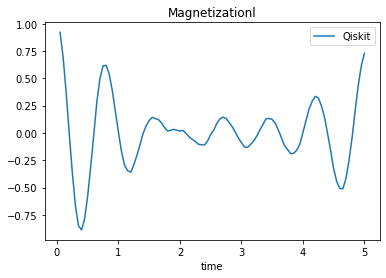

In [23]:
plt.plot(time_list, mag_list,label='Qiskit')
plt.title('Magnetizationl')
plt.xlabel('time')
plt.legend()
plt.show()

# Implementing the transverse Ising model (Time-dependent case)

Now we consider a **time-dependent case**, where the Hamiltonian is time-dependent. 

You can learn simulation of phase transition and quantum adiabatic algorithm (QAA) and quantum annealing. 

For practical appliactions to optimization problems using D-wave quantum annealer, please see 

K. Ikeda, Y. Nakamura, T. Humble, 
[Application of Quantum Annealing to Nurse Scheduling Problem](https://www.nature.com/articles/s41598-019-49172-3), which is recorded in [D-wave user handbook](https://docs.dwavesys.com/docs/latest/handbook_problems.html). The code is available [here](https://github.com/dwave-examples/nurse-scheduling).

We consider the time-dependent Ising Hamiltonian with longitudinal field and transverse field. 

The Hamiltonian is
$$
H(t)=tH_{ZZ}+tH_Z+(1-t)H_{X},~t\in[0,1]
$$
where
$$H_{ZZ}=-J\sum_{j=0}^{N-2}Z_{j}Z_{j+1},\quad H_{Z}=-g\sum_{j=0}^{N-1}Z_{j},\quad  H_{X}=-h\sum_{j=0}^{N-1}X_{j}$$

- The initial state is the quantum paramagnetic phase $\bigotimes_{j=0}^{N-1}|+\rangle$, which is the ground state of $H_X$. 

- The system evolves gradually from $H_X$ to $H_{ZZ}+H_Z$. 

- At end of computation, the system transitions into an anti-ferromagnetic phase if $J>0$ and a ferromagnetic phase if $J<0$, which are the ground state of $H_{ZZ}+H_Z$.


### Step 1: Generate the initial satte $\bigotimes_{j=0}^{N-1}|+\rangle_j$ (quantum paramagnetic phase)

In [24]:
### quantum registers
qr = QuantumRegister(n_site)
cr = ClassicalRegister(n_site)

### make main quantum circuit
qc = QuantumCircuit(qr,cr)

###make measurement circuit
qc_meas = QuantumCircuit(qr,cr)
qc_meas.measure(qr,cr)

# generate the quantum paramagnetic phase
for i in range(n_site):
  qc.h(qr[i])

qc.draw()


┌───┐
q1986_0: ┤ H ├
         ├───┤
q1986_1: ┤ H ├
         ├───┤
q1986_2: ┤ H ├
         ├───┤
q1986_3: ┤ H ├
         └───┘
   c9: 4/═════

### Step 2: Implement time-dependent Hamiltonian

We discretize the time as $t=k\Delta t,~k\in\{0,1,\cdots,1/\Delta t\}$. 

Then we can implement $k\Delta tH_{ZZ}, k\Delta tH_{Z}, (1-k\Delta t)H_{X}$ as 
$$e^{-iH_{ZZ}k\Delta t}=\prod_{j=0}^{N-2}CX_{j,j+1}R_{Z,j+1 }(-2Jk\Delta t)CX_{j,j+1}.$$
$$e^{-iH_{Z}k\Delta t}=\prod_{j=0}^{N-1}R_{Z,j }(-2gk\Delta t).$$
$$e^{-iH_{X}(1-k\Delta t)}=\prod_{j=0}^{N-1}R_{X,j }(-2h(1-k\Delta t)).$$

In [25]:
### parameters
n_site = 8
J = 3
h = 1
g=1.5

step_max = 100
t_max = 1
dt = t_max/step_max

### simulator and shots
simulator = Aer.get_backend('qasm_simulator')
n_shots = 10000

### quantum registers
qr = QuantumRegister(n_site)
cr = ClassicalRegister(n_site)

### make main quantum circuit
qc = QuantumCircuit(qr,cr)

###make measurement circuit
qc_meas = QuantumCircuit(qr,cr)
qc_meas.measure(qr,cr)

time_list_qiskit = [] # list of time
mag_list_qiskit = [] #list of magnetization

# generate the initial quantum paramagnetic phase
for i in range(n_site):
  qc.h(qr[i])

### Suzuki-Trotter steps
for step in range(1,step_max+1):
    #acting gates to implement one Suzuki-Trotter step
    ###exp(-iH_{ZZ}k\Delta t)
    for i in range(n_site-1):
        
        qc.cx(qr[i],qr[i+1])
        qc.rz(-2*J*step*dt, qr[i+1])
        qc.cx(qr[i],qr[i+1])

    ###exp(-iH_{Z}k\Delta t)    
    for i in range(n_site):
        qc.rz(-2*g*step*dt,qr[i])

    ###exp(-iH_{X}(1-k\Delta t))    
    for i in range(n_site):
        qc.rx(-2*h*(1-step*dt),qr[i])


        
    #combine the main circuit and the measurement circuit to have the total circuit
    qc_total = qc.compose(qc_meas)   
    
    #execute circuit
    job = execute(qc_total, simulator, shots=n_shots) #execute
    result = job.result() # obtain results
    counts = result.get_counts(qc_total) 
    
    #calculate magnetization
    mag = 0
    for bit_string, count in counts.items():
        
        obs = 0
        for j in range(n_site):
            obs += (-1)**int(bit_string[j])
        mag += obs*count/n_shots/n_site
        
    
    time_list_qiskit.append(dt*step) 
    mag_list_qiskit.append(mag) 

The peak corresponds to the critical point of the phase transition from the quantum paramagnetic phase to the antiferromagnetic phase. 

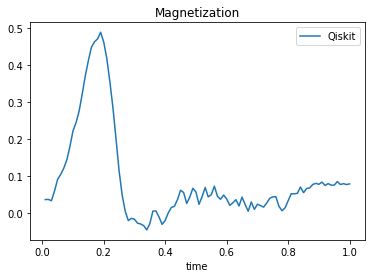

In [27]:
plt.plot(time_list_qiskit, mag_list_qiskit, "-",label='Qiskit')
plt.title('Magnetization')
plt.xlabel('time')
plt.legend()
plt.show()